In [2]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [3]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:2])

['/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/0510AD3C-A266-9544-B816-CACA36F1916F.root',
 '/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/142892DA-7F19-B743-A6BF-94DC12A7D0A1.root']


In [4]:
# lets plot stuff using ROOT RDataFrame
import ROOT
if d.prefix:
    files = [("root://" + d.prefix + f) for f in d.get_files()[0:1]]
else:
    files = d.get_files()
print files
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

Welcome to JupyROOT 6.18/04
['root://dcache-cms-xrootd.desy.de:1094//store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/0510AD3C-A266-9544-B816-CACA36F1916F.root']


In [ ]:
f = Feature("met_pt", "MET_pt")
hist = df.Histo1D(f.expression)
hist.SetLineColor(ROOT.TColor.GetColor(*d.process.color))
c = ROOT.TCanvas("", "", 800, 800)
hist.Draw()
c.Draw()

In [ ]:
f = Feature("met_pt", "MET_pt")
new_df = df.Filter("MET_pt > 90")
hist = new_df.Histo1D(f.expression)
hist.SetLineColor(ROOT.TColor.GetColor(*d.process.color))
c = ROOT.TCanvas("", "", 800, 800)
hist.Draw()
# c.Draw()
# new_df.Snapshot("Events", "skim.root")

In [ ]:
ROOT.gSystem.Load("../HHKinFit2/libHHKinFit2.so")
ROOT.gInterpreter.Declare('#include "/afs/cern.ch/work/j/jleonhol/private/cms_phys_ciemat/analysis_tools/HHKinFit2/interface/HHKinFitMasterHeavyHiggs.h"')


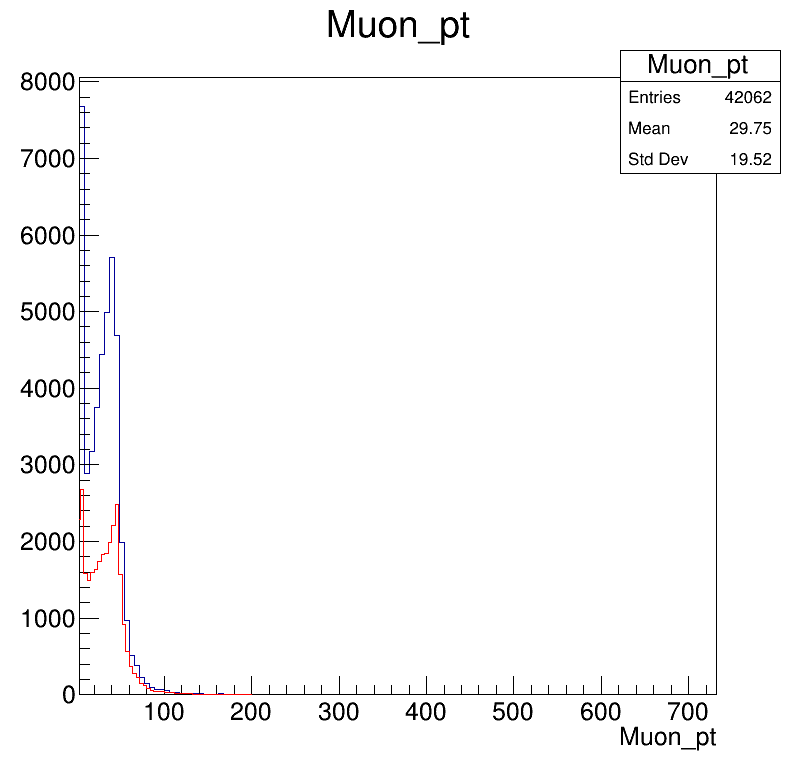

In [6]:
c = ROOT.TCanvas("", "", 800, 800)

f = Feature("nfatjet", "nFatJet")
hist = df.Histo1D(f.expression)
# hist.Draw()

f2 = Feature("Muon_pt", "Muon_pt")
hist2 = df.Histo1D(f2.expression)

ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    float pt_0(Vfloat pt, int n){
        if (n == 0) return -1.;
        else return pt[0];
    }
""")
hmodel = ("hpt","Muon p_{T}[GeV]",50,0., 200.)
muon_pt_0 = df.Define("Muon_pt_0", "pt_0(Muon_pt, nMuon)").Histo1D(hmodel,"Muon_pt_0")

hist2.Draw("same")
muon_pt_0.SetLineColor(ROOT.kRed)
muon_pt_0.Draw("same")


# # new_df = df.Filter("nMuon >= 1")
# # muon_charge_0 = new_df.Define("muon_charge_0", "Muon_charge[0]")
# # #f3 = Feature("Muon_charge", "Muon_charge[0]")
# hist3 = new_df.Histo1D(f3.expression)
# # hist3 = new_df.Histo1D("muon_charge_0")

# # hist2.Draw()
# hist3.SetLineColor(ROOT.kRed)
# hist3.Draw("same")
c.Draw()